In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("customer_purchase_data.csv")

In [3]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [4]:
df.shape

(1500, 9)

In [5]:
df.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

In [6]:
df['PurchaseStatus'].unique()

array([1, 0], dtype=int64)

In [7]:
df["PurchaseStatus"].value_counts()

PurchaseStatus
0    852
1    648
Name: count, dtype: int64

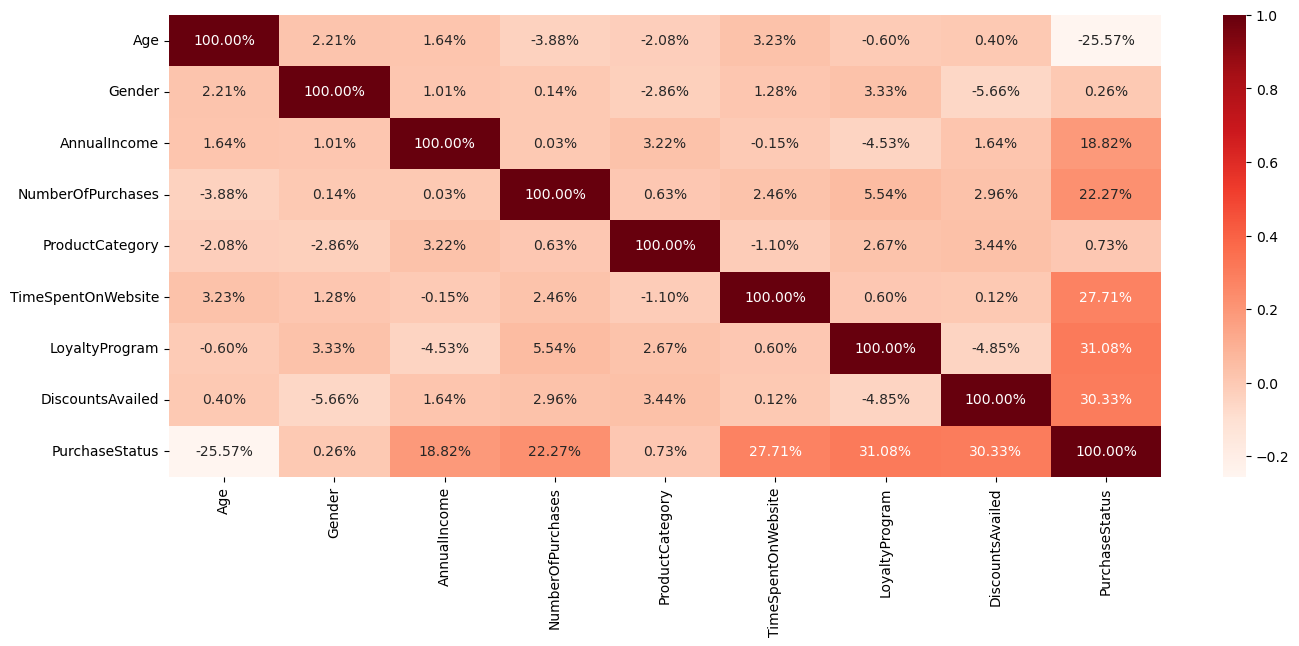

In [28]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), cmap='Reds', annot=True, fmt='.2%')
plt.show()

In [8]:
X = df.iloc[:,2:-1]
y = df['PurchaseStatus']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

model1.fit(X_train, y_train)

LogisticRegression()

In [12]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()

model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
y_pred_1 = model1.predict(X_test)

In [14]:
y_pred_2 = model2.predict(X_test)

In [15]:
#Importing performance metrics

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix ,ConfusionMatrixDisplay

score1=accuracy_score(y_test,y_pred_1)

In [16]:
score2=accuracy_score(y_test,y_pred_2)

In [17]:
print("Accuracy on a single split for Model 1 = {:.2f} %".format(score1*100))

Accuracy on a single split for Model 1 = 75.33 %


In [18]:
print("Accuracy on a single split for Model 2 = {:.2f} %".format(score2*100))

Accuracy on a single split for Model 2 = 77.67 %


#### *Applying K-Fold Cross Validation (Evaluating across 10 splits)*

In [20]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=model1, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.33 %
Standard Deviation: 2.49 %


In [21]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       170
           1       0.73      0.68      0.71       130

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



In [22]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       170
           1       0.76      0.71      0.73       130

    accuracy                           0.78       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.78      0.78      0.78       300



In [23]:
cm1 = confusion_matrix(y_test, y_pred_1)
print(cm1)

[[137  33]
 [ 41  89]]


In [24]:
cm2 = confusion_matrix(y_test, y_pred_2)
print(cm2)

[[141  29]
 [ 38  92]]


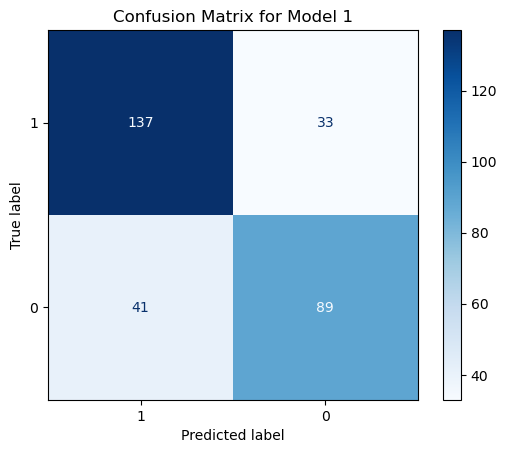

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=df["PurchaseStatus"].unique())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Model 1")
plt.show()

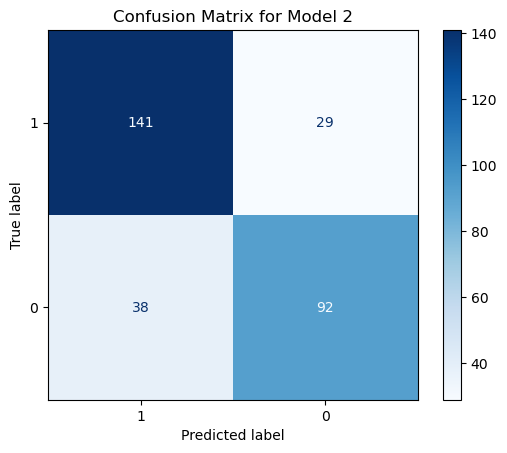

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=df["PurchaseStatus"].unique())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Model 2")
plt.show()